In [ ]:
from agoge_yt import *
 
hdf5_filename = "../agoge_final.h5"  # Replace with your actual HDF5 file path
visualize_agoge_data(hdf5_filename)


In [1]:
import agoge_viz as av

# 1) read data

data = av.read_agoge_hdf5("../agoge_init.h5")

# 2) line plot
av.plot_line(data, field="rho", axis="x", index_j=31, index_k=31)

# 3) slice plot
# av.plot_slice(data, field="phi", plane="z", plane_index=10)


AttributeError: module 'agoge_viz' has no attribute 'read_agoge_hdf5'

In [ ]:
87,292,308 / (1,133,934,846 * 64)

: 

: 

In [28]:
import numpy as np
def compFFT(N):
    return N * np.log2(N)
    
def AI(flops, bw):
    return flops / bw

def dpTot(n):
    return n**3 * 8. / 1e6

# FFT
# 512^3
DP_GFLOPS = np.mean([3.012, 2.828])
DRAM_GBs = np.mean([2.103, 4.660])
print("512^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)

## 256^3:
DP_GFLOPS = np.mean([3.775, 4.158])
DRAM_GBs = np.mean([4.508, 6.026])
print("256^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)


## 128^3:
DP_GFLOPS = np.mean([4.007, 4.929])
DRAM_GBs = np.mean([2.589, 1.943])
print("128^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)

## 64^3:
DP_GFLOPS = np.mean([ 5.080, 5.800])
DRAM_GBs = np.mean([0.072, 0.020 ])
print("64^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)

## 32^3:
DP_GFLOPS = np.mean([5.761, 5.566])
DRAM_GBs = np.mean([0.051, 0.028 ])
print("32^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)


512^3 AI =  0.8635221055744492 2.92
256^3 AI =  0.7530852477691286 3.9665
128^3 AI =  1.9717563989408649 4.468
64^3 AI =  118.26086956521738 5.4399999999999995
32^3 AI =  143.37974683544303 5.6635


In [29]:
# FD 

# 512^3
DP_GFLOPS = np.mean([1.446, 1.446])
DRAM_GBs = np.mean([5.858, 3.812])
print("512^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)

## 256^3:
DP_GFLOPS = np.mean([1.894, 1.898])
DRAM_GBs = np.mean([6.662, 6.474])
print("256^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)

## 128^3:
DP_GFLOPS = np.mean([1.934, 1.897])
DRAM_GBs = np.mean([7.102, 7.053])
print("128^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)

## 64^3:
DP_GFLOPS = np.mean([ 2.194, 2.121])
DRAM_GBs = np.mean([6.557, 6.367 ])
print("64^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)

## 32^3:
DP_GFLOPS = np.mean([2.568, 2.606])
DRAM_GBs = np.mean([0.102, 0.860 ])
print("32^3 AI = ", AI(DP_GFLOPS, DRAM_GBs), DP_GFLOPS)




512^3 AI =  0.2990692864529472 1.446
256^3 AI =  0.28867235079171744 1.896
128^3 AI =  0.2706464146944542 1.9155
64^3 AI =  0.33387496131228717 2.1574999999999998
32^3 AI =  5.378378378378378 2.5869999999999997


$$
FP / RI = 1.586 \\
FP / WI = 2.724 \\
\Rightarrow WI = FP / 2.724 = 45.55 Giga-instructions \\
FP = 1.446 \times 85.815 = 124.09 GFLOP
RI = 124.09 / 1.586 = 78.24 Gi 
$$

In [14]:
124.09 / (8. * ( 78.24))

0.198252172801636

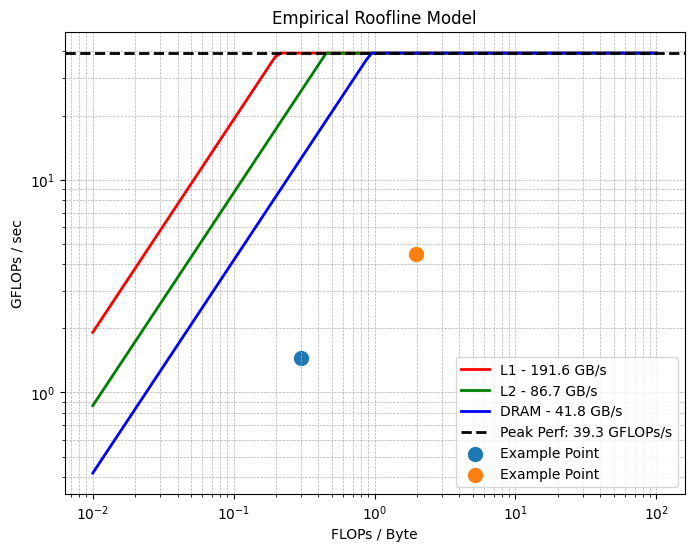

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_roofline(l1_bw=191.6, l2_bw=86.7, dram_bw=41.8, peak_perf=39.3):
    """
    Plots an Empirical Roofline Model with customizable L1, L2, and DRAM bandwidths, 
    as well as peak performance.
    
    Parameters:
        l1_bw (float): L1 cache bandwidth in GB/s.
        l2_bw (float): L2 cache bandwidth in GB/s.
        dram_bw (float): DRAM bandwidth in GB/s.
        peak_perf (float): Peak floating point performance in GFLOPs/sec.
    """
    # Define FLOP/Byte operational intensity range
    intensity = np.logspace(-2, 2, 100)  # Log scale from 0.01 to 100

    # Compute roofline limits
    l1_limit = np.minimum(intensity * l1_bw, peak_perf)
    l2_limit = np.minimum(intensity * l2_bw, peak_perf)
    dram_limit = np.minimum(intensity * dram_bw, peak_perf)

    # Plot setup
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("FLOPs / Byte")
    ax.set_ylabel("GFLOPs / sec")
    ax.set_title("Empirical Roofline Model")

    # Plot the roofline bands
    ax.plot(intensity, l1_limit, label=f"L1 - {l1_bw} GB/s", linestyle='-', linewidth=2, color='r')
    ax.plot(intensity, l2_limit, label=f"L2 - {l2_bw} GB/s", linestyle='-', linewidth=2, color='g')
    ax.plot(intensity, dram_limit, label=f"DRAM - {dram_bw} GB/s", linestyle='-', linewidth=2, color='b')

    # Peak Performance Line
    ax.axhline(y=peak_perf, color='black', linestyle='--', linewidth=2, label=f"Peak Perf: {peak_perf} GFLOPs/s")

    ax.scatter(0.2990692864529472, 1.446, s=100, label="Example Point")
    
    ax.scatter(1.9717563989408649, 4.468, s=100, label="Example Point")

    # Grid and legend
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.legend()
    
    # Show plot
    plt.show()

    return ax 

# Example usage with default values extracted from PDF
ax = plot_roofline()
